In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("data/diamonds.csv")

In [3]:
df.shape

(53940, 10)

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
carat,53940.0,0.797940,0.474011,0.2,0.40,0.70,1.04,5.01
depth,53940.0,61.749405,1.432621,43.0,61.00,61.80,62.50,79.00
table,53940.0,57.457184,2.234491,43.0,56.00,57.00,59.00,95.00
price,53940.0,3932.799722,3989.439738,326.0,950.00,2401.00,5324.25,18823.00
x,53940.0,5.731157,1.121761,0.0,4.71,5.70,6.54,10.74
y,53940.0,5.734526,1.142135,0.0,4.72,5.71,6.54,58.90
z,53940.0,3.538734,0.705699,0.0,2.91,3.53,4.04,31.80


In [7]:
for i in df:
    if len(df[i].unique())<10:
        print(f'{i} = {df[i].unique()}')

cut = ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color = ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity = ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


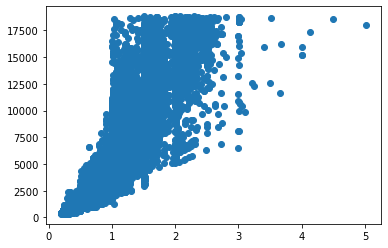

In [8]:
plt.scatter(df['carat'], df['price'])

<AxesSubplot:xlabel='cut'>

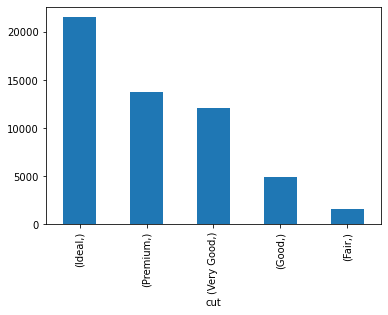

In [9]:
(df[['cut']]).value_counts().plot(kind='bar')

<AxesSubplot:xlabel='color'>

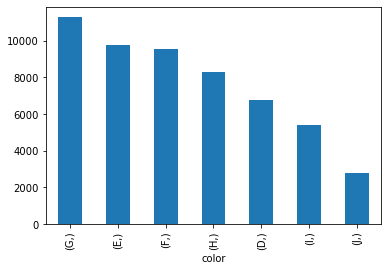

In [10]:
(df[['color']]).value_counts().plot(kind='bar')

<AxesSubplot:xlabel='clarity'>

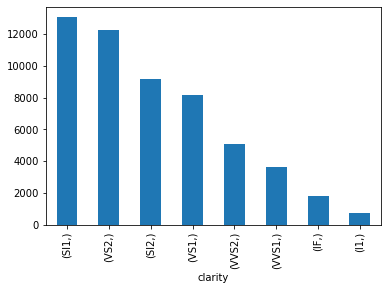

In [11]:
(df[['clarity']]).value_counts().plot(kind='bar')

In [12]:
#rearranging columns

In [13]:
df = df.iloc[:, [0,1,2,3,4,5,7,8,9,6]]

In [14]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,326
1,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,326
2,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,327
3,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,334
4,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,335


In [15]:
#cheking for outliers
col_name = df.select_dtypes(include=['int','float']).columns

for i in col_name:
    mean = df[i].mean()
    med = df[i].median()
    print(f'mean for {i} is {mean}')
    print(f'median for {i} is {med}')

mean for carat is 0.7979397478679852
median for carat is 0.7
mean for depth is 61.74940489432624
median for depth is 61.8
mean for table is 57.45718390804603
median for table is 57.0
mean for x is 5.731157211716609
median for x is 5.7
mean for y is 5.734525954764462
median for y is 5.71
mean for z is 3.5387337782723316
median for z is 3.53
mean for price is 3932.799721913237
median for price is 2401.0


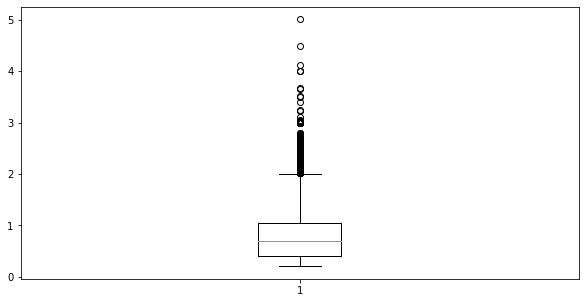

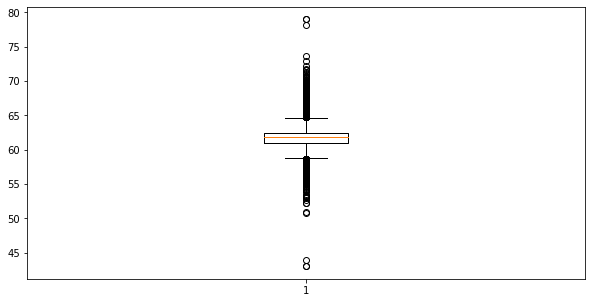

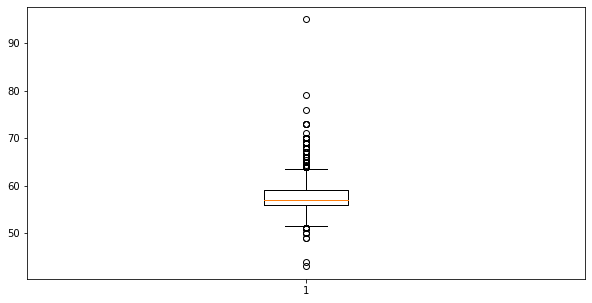

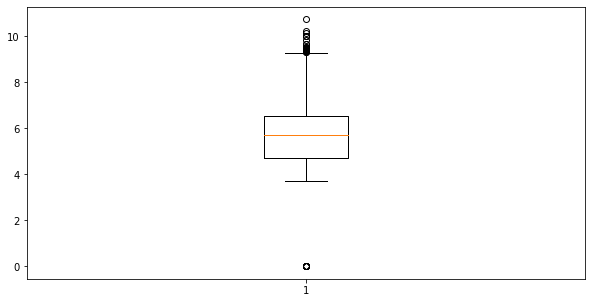

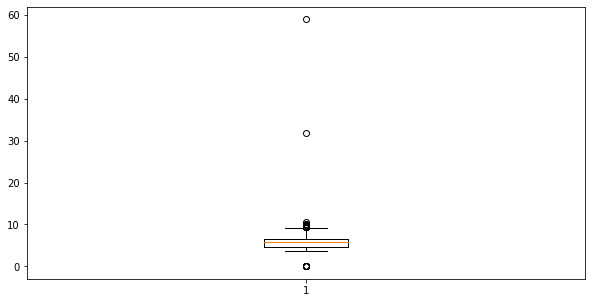

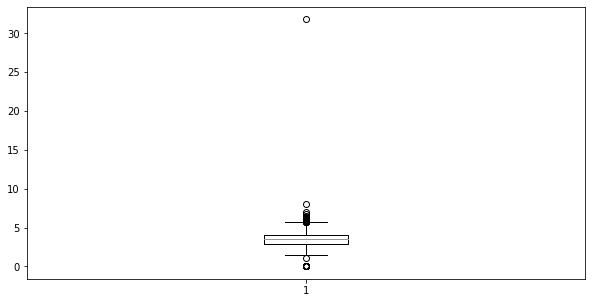

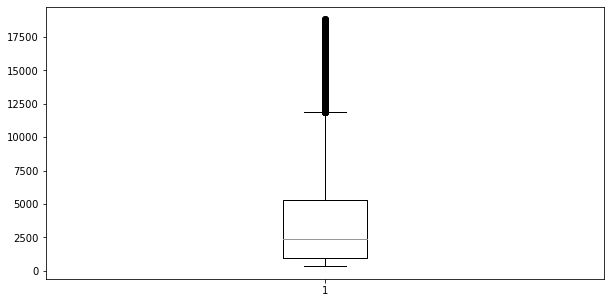

In [16]:
# fig.suptitle
for n, i in enumerate(col_name):
    fig, axs = plt.subplots(nrows=1, ncols=1 ,figsize =(10,5))
    plt.boxplot(df[i])
    plt.show()
    

In [17]:
#Treating Outliers

In [18]:
def outliers(col_name):
    Q1 = np.percentile(df[col_name], 25,
                   interpolation = 'midpoint')
 
    Q3 = np.percentile(df[col_name], 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1

    upper = Q3+(1.5*IQR)
    lower = Q1-(1.5*IQR)

    
    df.drop(df[(df[col_name] > upper) | (df[col_name] < lower)].index, inplace=True)

In [19]:
for i in col_name:
    outliers(i)

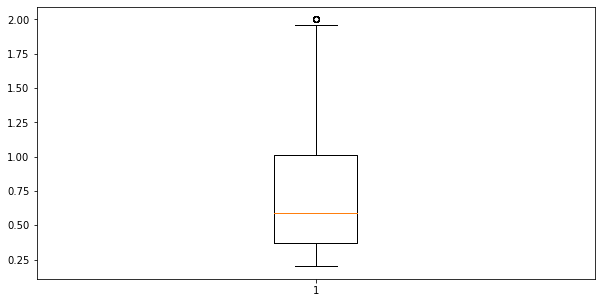

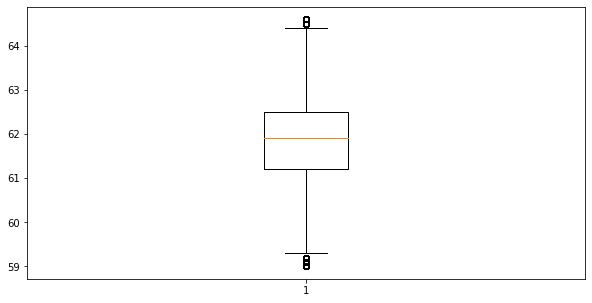

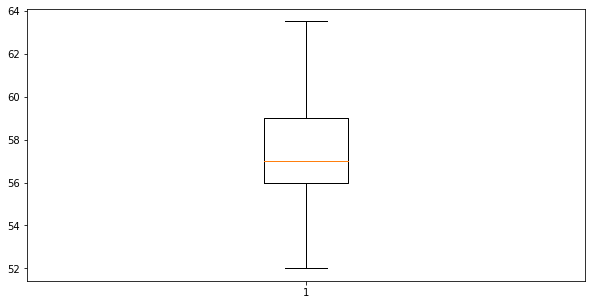

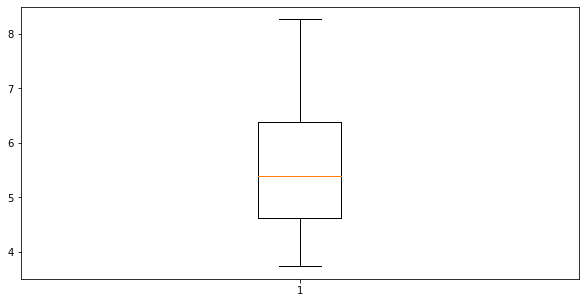

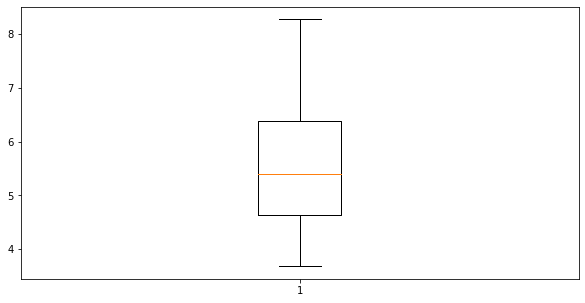

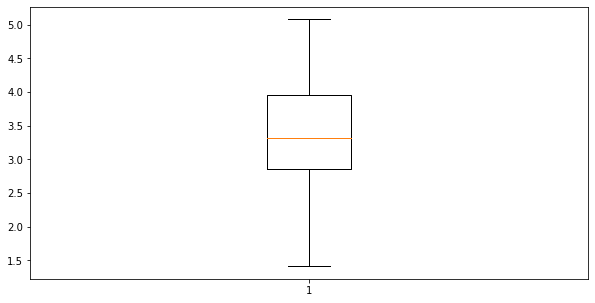

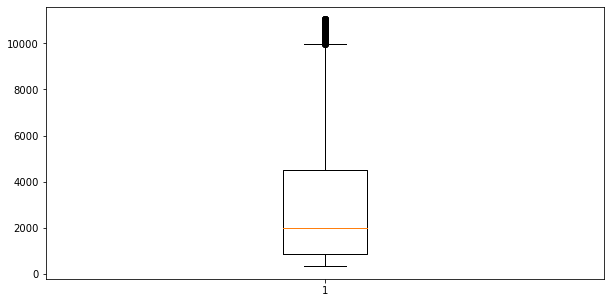

In [20]:
for n, i in enumerate(col_name):
    fig, axs = plt.subplots(nrows=1, ncols=1 ,figsize =(10,5))
    plt.boxplot(df[i])
    plt.show()

<AxesSubplot:>

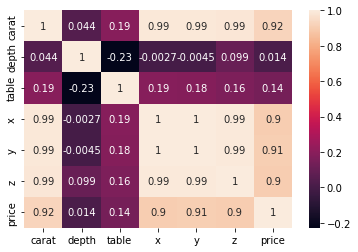

In [21]:
sns.heatmap(df.iloc[:,:].corr(),annot=True)

In [22]:
x = df.iloc[:,:9]
y = df['price']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

def split_data(x,y):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.25)
    return x_train, x_test, y_train, y_test

def Preproced(x,y):
    le = LabelEncoder()
    x_cat = x.select_dtypes(include=['object'])
    x_num = x.select_dtypes(include=['int64', 'float64'])
    for i in x.select_dtypes(include= ['object']):
        x_cat[i] = le.fit_transform(x_cat[i])
    x_cn = pd.concat([x_cat, x_num], axis=1)      
    return x_cn

def scal_down(x):
    scl = StandardScaler()
    new_x = pd.DataFrame(scl.fit_transform(x), columns=x.columns, index = [x.index])
    return new_x

In [24]:
x_train, x_test,y_train, y_test = split_data(x,y)

## train data

In [25]:
pre_x_train = Preproced(x_train,y_train)

C:\Users\avina\AppData\Local\Temp/ipykernel_1596/1083632792.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cat[i] = le.fit_transform(x_cat[i])


In [26]:
pre_x_train.head()

,cut,color,clarity,carat,depth,table,x,y,z
35273,3,3,1,0.30,60.2,58.0,4.35,4.39,2.63
11775,2,3,2,1.02,62.2,56.0,6.44,6.46,4.01
9224,3,4,3,1.10,62.6,57.0,6.60,6.56,4.12
11315,2,6,5,1.23,61.8,56.0,6.87,6.81,4.23
22875,4,1,6,1.05,59.5,60.0,6.56,6.66,3.93


#### standardization _train_data

In [27]:
x_train_new = scal_down(pre_x_train)
x_train_new.head()

,cut,color,clarity,carat,depth,table,x,y,z
35273,0.400388,0.274590,-1.667101,-1.096823,-1.488129,0.377643,-1.211909,-1.182523,-1.309520
11775,-0.665308,0.274590,-1.088895,0.892175,0.371979,-0.616342,0.954730,0.976380,1.000880
9224,0.400388,0.867264,-0.510688,1.113175,0.744001,-0.119350,1.120597,1.080675,1.185042
11315,-0.665308,2.052613,0.645725,1.472300,-0.000043,-0.616342,1.400498,1.341412,1.369205
22875,1.466083,-0.910759,1.223932,0.975050,-2.139167,1.371628,1.079131,1.184970,0.866944


## test_data

In [28]:
pre_x_test = Preproced(x_test, y_test)
pre_x_test.head()

C:\Users\avina\AppData\Local\Temp/ipykernel_1596/1083632792.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_cat[i] = le.fit_transform(x_cat[i])


,cut,color,clarity,carat,depth,table,x,y,z
18412,3,0,5,1.02,61.5,58.0,6.51,6.44,3.98
41436,2,3,3,0.55,61.8,55.0,5.27,5.32,3.27
50341,2,0,5,0.62,61.2,56.0,5.49,5.52,3.37
14737,2,1,2,1.09,61.1,55.0,6.66,6.70,4.08
39958,1,0,3,0.33,63.3,53.0,4.39,4.42,2.79


#### standarization_test_data

In [29]:
x_test_new = scal_down(pre_x_test)
x_test_new.head()

,cut,color,clarity,carat,depth,table,x,y,z
18412,0.395020,-1.507050,0.638114,0.882247,-0.292584,0.379224,1.018923,0.946126,0.940461
41436,-0.650785,0.279631,-0.518325,-0.416082,-0.015746,-1.106668,-0.267650,-0.223117,-0.249192
50341,-0.650785,-1.507050,0.638114,-0.222714,-0.569423,-0.611371,-0.039387,-0.014324,-0.081635
14737,-0.650785,-0.911490,-1.096544,1.075615,-0.661702,-1.106668,1.174557,1.217557,1.108018
39958,-1.696589,-1.507050,-0.518325,-1.023810,1.368445,-2.097263,-1.180701,-1.162687,-1.053464


## KNN_REGRESSION

In [30]:
class KNN_Regression:
    def __init__(self,k):
        self.k=k
        
    def fit_func(self,X,y):
        self.X=np.asarray(X)
        self.y=np.asarray(y)
        
    def predict_func(self,X):
        X=np.asarray(X)
        predict=[]
        for x in X:
            distance=np.sqrt(np.sum((x-self.X)**2,axis=1))
            sort_value=distance.argsort()
            sort_value=sort_value[:self.k]
            predict.append(np.mean(self.y[sort_value]))
        return np.array(predict)

In [31]:
Model=KNN_Regression(k=3)
Model.fit_func(x_train_new,y_train)
y_pred_KNN=Model.predict_func(x_test_new)

In [32]:
y_pred_KNN

array([7257.66666667, 1127.33333333, 2019.        , ..., 1914.        ,
        882.        , 5807.33333333])

In [36]:
from sklearn import metrics
scratch_acu=metrics.r2_score(y_test,y_pred_KNN)
scratch_acu

0.9619350108605802

In [37]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred_KNN))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred_KNN))


print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_KNN)))

Mean Absolute Error:  289.5214476059486
Mean Squared Error:  260129.09509346017
Root Mean Squared Error:  510.02852380377726


## Using KNN sklearn

In [38]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(x_train_new, y_train)
y_test_pred = regressor.predict(x_test_new)
sk_acu=metrics.r2_score(y_test,y_test_pred)
sk_acu

0.9621188316068272